In [1]:
# IMPORT LIBRARY

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import imutils
import os
import scipy
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras

from __future__ import absolute_import, division, print_function
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Import Data Ke Variabel
# Data 150x150

base_dir = 'C:/Users/muham/Desktop/lelah_TA/fix_data/150x150/FormatData_A'

In [3]:
# AUGMENTASI

np.random.seed = (100)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.1,
                             rotation_range=15,
                             horizontal_flip=True,
                             shear_range=0.15,
                             fill_mode = 'nearest')

# valid_datagen = ImageDataGenerator(rescale=1./255,
#                                    validation_split=0.1)

train_data = datagen.flow_from_directory(base_dir,
                                         batch_size=batch_size,
                                         target_size=(150,150),
                                         class_mode='categorical',
                                         subset='training',
                                         shuffle=True)
 
valid_data = datagen.flow_from_directory(base_dir,
                                         batch_size=batch_size,
                                         target_size=(150,150),
                                         class_mode='categorical',
                                         subset='validation',
                                         shuffle=False)

Found 4542 images belonging to 4 classes.
Found 502 images belonging to 4 classes.


In [9]:
# CNN MODEL

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # 32 filter, (3,3) kernelnya, aktifatornya menggunakan relu input demensi 150x150x3 (3 untuk rgb)
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(4, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
# COMPILING MODEL

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# SAVING BEST MODEL

checkpoint_path = "C:/Users/muham/Desktop/lelah_TA/code/Program_A/model/model_1.h5"

checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=2, 
                             save_best_only=True, 
                             mode='max')

callbacks_list = [
    checkpoint,
]

In [13]:
history_1 = model.fit(train_data,
                      epochs=100,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data, 
                      validation_steps=len(valid_data),
                      callbacks=checkpoint)

Epoch 1/100
142/142 [==============================] - ETA: 0s - loss: 1.2307 - accuracy: 0.4256
Epoch 1: val_accuracy improved from -inf to 0.59163, saving model to C:/Users/muham/Desktop/lelah_TA/code/Program_A/model\model_1.h5
142/142 [==============================] - 67s 469ms/step - loss: 1.2307 - accuracy: 0.4256 - val_loss: 0.9552 - val_accuracy: 0.5916
Epoch 2/100
142/142 [==============================] - ETA: 0s - loss: 1.1245 - accuracy: 0.5092
Epoch 2: val_accuracy improved from 0.59163 to 0.61952, saving model to C:/Users/muham/Desktop/lelah_TA/code/Program_A/model\model_1.h5
142/142 [==============================] - 69s 489ms/step - loss: 1.1245 - accuracy: 0.5092 - val_loss: 0.9884 - val_accuracy: 0.6195
Epoch 3/100
142/142 [==============================] - ETA: 0s - loss: 1.0569 - accuracy: 0.5227
Epoch 3: val_accuracy improved from 0.61952 to 0.65936, saving model to C:/Users/muham/Desktop/lelah_TA/code/Program_A/model\model_1.h5
142/142 [===========================

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

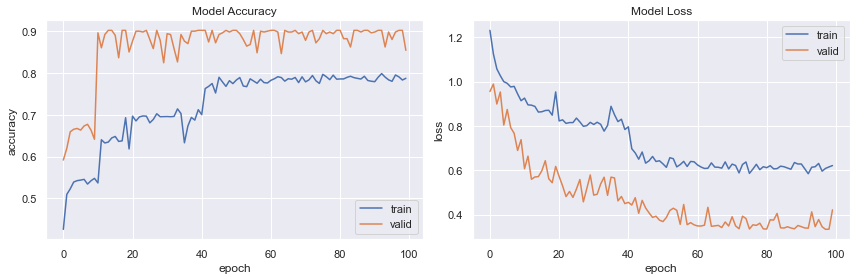

In [14]:
from matplotlib import pyplot
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history_1.epoch, history_1.history['accuracy'], label='train')
sns.lineplot(history_1.epoch, history_1.history['val_accuracy'], label='valid')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.title('Model Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history_1.epoch, history_1.history['loss'], label='train')
sns.lineplot(history_1.epoch, history_1.history['val_loss'], label='valid')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.title('Model Loss')
pyplot.tight_layout()

pyplot.show()

In [4]:
# LOAD MODEL

new_model = keras.models.load_model('C:/Users/muham/Desktop/lelah_TA/code/Program_A/1A/model/model_1.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
loss, acc = new_model.evaluate(valid_data)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

16/16 [==============================] - 6s 384ms/step - loss: 0.5695 - accuracy: 0.9024
Restored model, accuracy: 90.24%


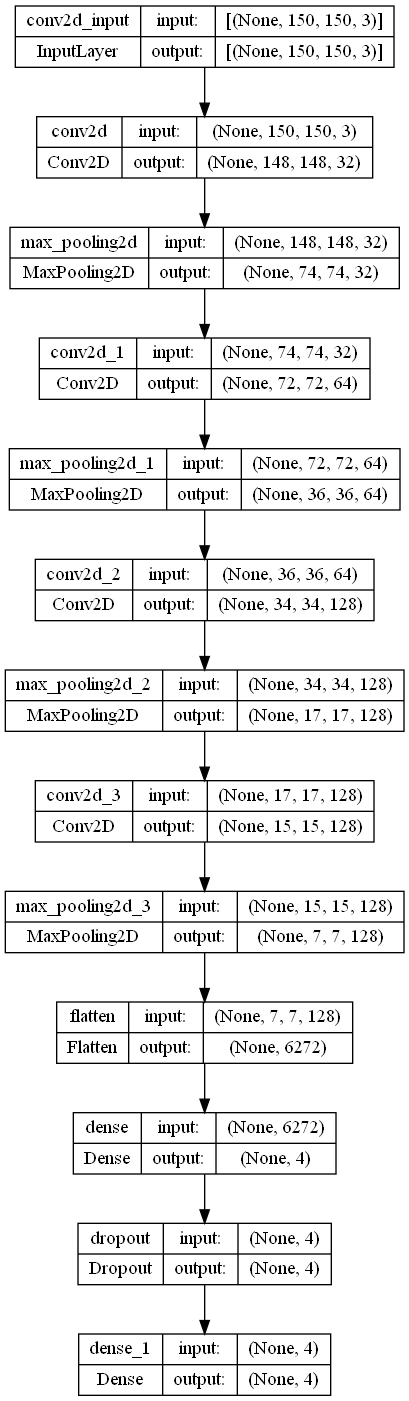

In [6]:
from keras.utils.vis_utils import plot_model

plot_model(new_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
Y_pred = new_model.predict(valid_data)
y_pred = np.argmax(Y_pred, axis=1)

16/16 [==============================] - 3s 177ms/step


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
kategori= sorted(os.listdir('C:/Users/muham/Desktop/lelah_TA/fix_data/150x150/FormatData_A'))
print(f'total wrong validation predictions: {np.sum(valid_data.classes != y_pred)}\n\n')
print(classification_report(valid_data.classes,y_pred))

total wrong validation predictions: 49


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       0.00      0.00      0.00        49
           2       1.00      1.00      1.00       197
           3       0.70      1.00      0.82       113

    accuracy                           0.90       502
   macro avg       0.67      0.75      0.71       502
weighted avg       0.83      0.90      0.86       502



C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Text(0.5, 1.0, 'Normalized Confusion Matrix')

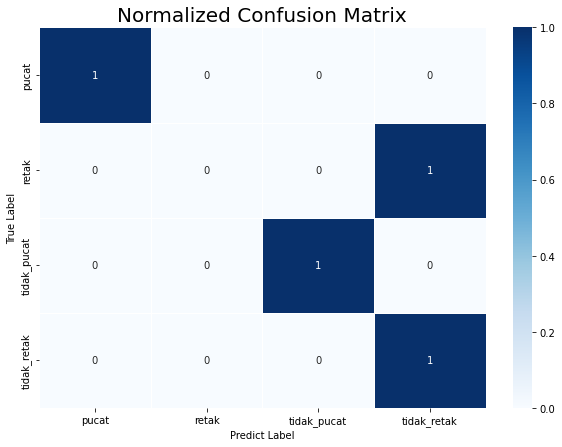

In [8]:
from matplotlib import pyplot
cf_matrix = confusion_matrix(valid_data.classes, y_pred, normalize='true')
fig, ax = pyplot.subplots(figsize=(10,7))
NormalizedConfMatrix = sns.heatmap(cf_matrix, linewidths=1,
                                   annot=True, 
                                   ax=ax, 
                                   xticklabels=kategori, 
                                   yticklabels=kategori,
                                   cmap="Blues")
NormalizedConfMatrix.set(xlabel='Predict Label', ylabel='True Label')
NormalizedConfMatrix.set_title("Normalized Confusion Matrix", fontsize =20)

Text(0.5, 1.0, 'Confusion Matrix')

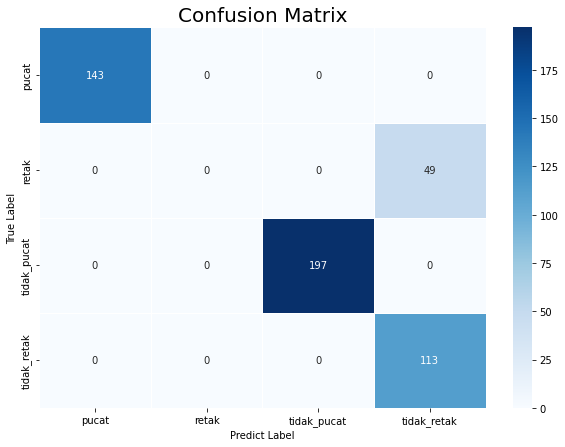

In [9]:
cf = confusion_matrix(valid_data.classes,y_pred)
fig, ax = pyplot.subplots(figsize=(10,7))
ConfMatrix = sns.heatmap(cf, linewidths=1,
                         annot=True, 
                         ax=ax, 
                         xticklabels=kategori,
                         yticklabels=kategori,fmt='d', 
                         cmap="Blues")
ConfMatrix.set(xlabel='Predict Label', ylabel='True Label')
ConfMatrix.set_title("Confusion Matrix", fontsize =20)

In [5]:
train_data.class_indices

{'pucat': 0, 'retak': 1, 'tidak_pucat': 2, 'tidak_retak': 3}

1/1 [==============================] - 2s 2s/step
C:/Users/muham/Desktop/lelah_TA/fix_data/DataTest/no_candle/dataset1/after_preprocessing/image00.jpg
Telur ini tidak_pucat


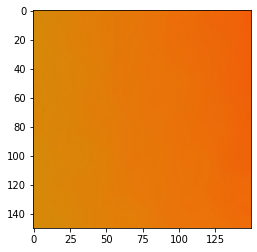

In [6]:
# PREDIKSI DAN TESTING

path = 'C:/Users/muham/Desktop/lelah_TA/fix_data/DataTest/no_candle/dataset1/after_preprocessing/image00.jpg'

img = image.load_img(path, target_size = (150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = new_model.predict(images, batch_size = 100)

print(path)

class_list = os.listdir('C:/Users/muham/Desktop/lelah_TA/fix_data/150x150/FormatData_A')

for j in range(42):
    if classes[0][j] == 1. :
        print('Telur ini', class_list[j])
        break
    # else:
    #     print('Keadaan telur tidak dapat terdeteksi')
    #     break